LAB: Visualización de datos usando Matplotlib
==========================================

In [298]:
## inicialización
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas
%matplotlib inline

import glob
import pandas
import os
import re
import string
import sys
import matplotlib.pyplot
import numpy
from matplotlib.pyplot import figure
import pylab
from matplotlib.lines import Line2D
from matplotlib import gridspec

In [3]:
!{sys.executable} -m pip install xlrd

In [4]:
os.chdir("/app/Laboratorios/07-matplot=1/lab-visualizacion-matplotlib-jlcossio/")

## Punto 1

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-2.png)


<Figure size 432x288 with 0 Axes>

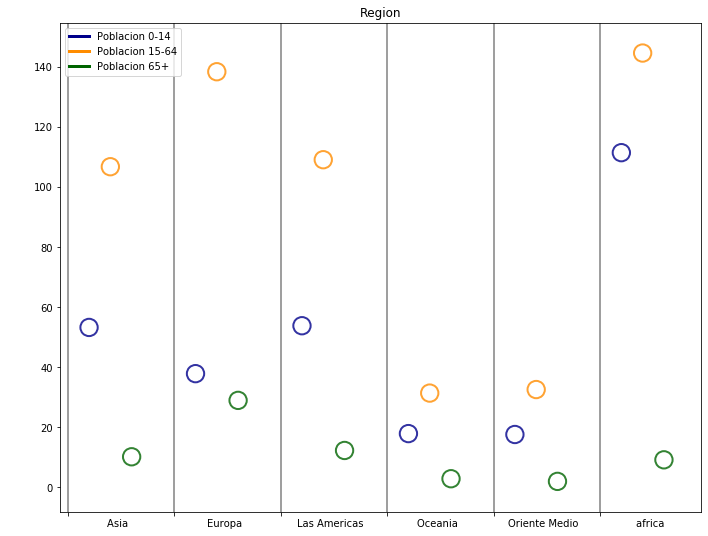

In [16]:
##################Alista la información para el gráfico
datos = pandas.read_csv("./indicadores-mundiales.csv", sep=",", encoding = "ISO-8859-1")
punto1 = datos[['Region','Poblacion 0-14','Poblacion 15-64','Poblacion 65+']]
punto1 = punto1.groupby([punto1['Region']]).sum()
#Le asigna un valor a cada población en función de su región para que queden en la dispersión adecuada
punto1 = punto1.reset_index()
punto1 = punto1.sort_values("Region")
punto1["Valor region"] = list(np.arange(10,70,10))
punto1 = punto1.melt(id_vars=[punto1.columns[0],punto1.columns[4]], var_name="Grupo_demografico", value_name="Valor")
punto1["Valor"] = punto1["Valor"]/100
#Función para separar un poco las dispersiones entre las poblaciones de lamisma region_i
def regiones(punto, i):
    temp = []
    temp = [[punto1.iloc[i-1,1]+2, punto1.iloc[i-1,3]]]
    temp.append([punto1.iloc[i-1+6,1]+2+2, punto1.iloc[i-1+6,3]])
    temp.append([punto1.iloc[i-1+6+6,1]+2+2+2, punto1.iloc[i-1+6+6,3]])
    return(temp)
    
for i in list(range(int((len(punto1["Region"])/3)+1))):
    if i == 1:
        region1 = regiones(punto1, i)
    elif i == 2:
        region2 = regiones(punto1, i)
    elif i == 3:
        region3 = regiones(punto1, i)
    elif i == 4:
        region4 = regiones(punto1, i)
    elif i == 5:
        region5 = regiones(punto1, i)
    elif i == 6:
        region6 = regiones(punto1, i)

##################Grafico
points = (numpy.array(region1[0]), numpy.array(region1[1]), numpy.array(region1[2]),
         numpy.array(region2[0]), numpy.array(region2[1]), numpy.array(region2[2]),
         numpy.array(region3[0]), numpy.array(region3[1]), numpy.array(region3[2]),
         numpy.array(region4[0]), numpy.array(region4[1]), numpy.array(region4[2]),
         numpy.array(region5[0]), numpy.array(region5[1]), numpy.array(region5[2]),
         numpy.array(region6[0]), numpy.array(region6[1]), numpy.array(region6[2]))
#Le asigna colores y grupos a las seis regiones
colors = ("darkblue", "darkorange", "darkgreen") * 6
groups = ("Poblacion 0-14", "Poblacion 15-64", "Poblacion 65+") * 6

#Grafica con un for punto por punto
fig = plt.figure()
f, ax = plt.subplots(1, 1, figsize = (11.5, 9))  #Le da tamaño al grafico
for points, color, group in zip(points, colors, groups):
    x, y = points
    ax.scatter(x, y, s=300, alpha=0.8, c="none", edgecolors=color, label=group, marker="o", linewidths=2)
    #punto a punto y su formato: s-tamaño delpunto | c-relleno | adegecolor-borde | label-nombre del punto | marker-tipo de punto | linewidths-grosor del borde

#Personaliza la leyenda del eje X
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '                                Asia'
labels[2] = '                                Europa'
labels[3] = '                                Las Americas'
labels[4] = '                                Oceania'
labels[5] = '                                Oriente Medio'
labels[6] = '                                africa'
ax.set_xticklabels(labels, rotation="horizontal")

#Lineas verticales en cada x definido
ax.axvline(x=10, c="gray")
ax.axvline(x=20, c="gray")
ax.axvline(x=30, c="gray")
ax.axvline(x=40, c="gray")
ax.axvline(x=50, c="gray")
ax.axvline(x=60, c="gray")
#Titulo del gráfico, también caja de leyenda personalizada
plt.title('Region')
custom_legend = [Line2D([0], [0], color="darkblue", lw=3),
                Line2D([0], [0], color="darkorange", lw=3),
                Line2D([0], [0], color="darkgreen", lw=3)]
ax.legend(custom_legend, ['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+'], loc='upper left')
#plt.figure(figsize=(1, 60), dpi=800, facecolor='w', edgecolor='k')
plt.show()

## Punto 2

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-3.png)


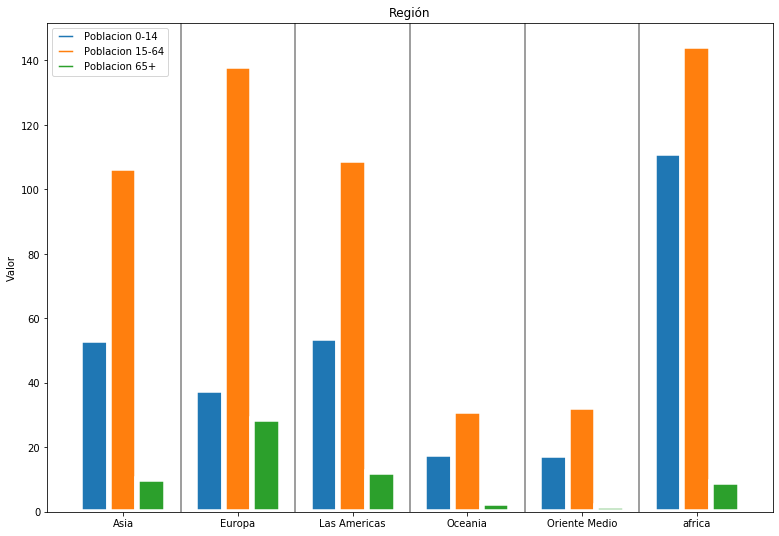

In [176]:
punto2 = datos[['Region','Poblacion 0-14','Poblacion 15-64','Poblacion 65+']]
punto2 = punto2.groupby([punto2['Region']]).sum()/100
regiones = punto2.index
jovenes = list(punto2["Poblacion 0-14"])
adultos = list(punto2["Poblacion 15-64"])
ancianos = list(punto2["Poblacion 65+"])

x = np.arange(len(regiones))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize = (13, 9))
rects1 = ax.bar(x - width*999/1000, jovenes, width, label='Poblacion 0-14', edgecolor="white", lw=5.5)
rects2 = ax.bar(x , adultos, width, label='Poblacion 15-64', edgecolor="white", lw=5.5)
rects3 = ax.bar(x + width*999/1000, ancianos, width, label='Poblacion 65+', edgecolor="white", lw=5.5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Valor')
ax.set_title('Región')
ax.set_xticks(x)
ax.set_xticklabels(regiones)
ax.legend()

ax.axvline(x=0.5, c="gray")
ax.axvline(x=1.5, c="gray")
ax.axvline(x=2.5, c="gray")
ax.axvline(x=3.5, c="gray")
ax.axvline(x=4.5, c="gray")

plt.show()

## Punto 3
Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act3](images/suma-pob-region-edades-4.png)

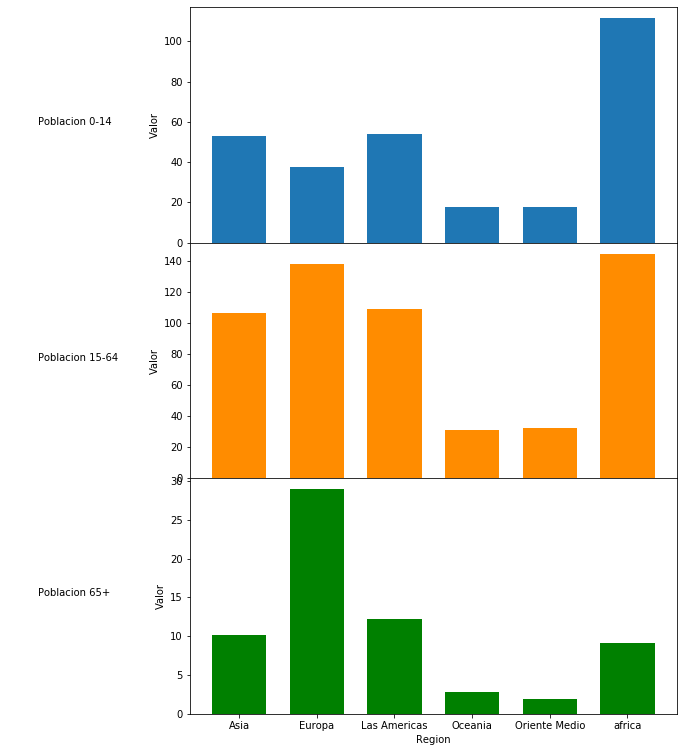

In [457]:
punto3 = datos[['Region','Poblacion 0-14','Poblacion 15-64','Poblacion 65+']]
punto3 = punto3.groupby([punto3['Region']]).sum()/100
regiones = punto3.index
jovenes = punto3["Poblacion 0-14"]
adultos = punto3["Poblacion 15-64"]
ancianos = punto3["Poblacion 65+"]

x = np.arange(len(regiones))  # the label locations
width = 0.7  # the width of the bars

fig, axs = plt.subplots(3, 2, sharex="all", figsize=(12, 13))
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 4]) 
fig.subplots_adjust(hspace = 0)

ax1 = plt.subplot(gs[1])
ax1.bar(x , jovenes, width)
plt.ylabel('Valor')
ax2 = plt.subplot(gs[0])
ax2.text(0.25, 0.5, "Poblacion 0-14")
ax2.axis("off")

ax3 = plt.subplot(gs[3])
ax3.bar(x , adultos, width, color="darkorange")
plt.ylabel('Valor')
ax3 = plt.subplot(gs[2])
ax3.text(0.25, 0.5, "Poblacion 15-64")
ax3.axis("off")

ax4 = plt.subplot(gs[5])
ax4.bar(x , ancianos, width, color="green", label=regiones)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'Asia'
labels[2] = 'Europa'
labels[3] = 'Las Americas'
labels[4] = 'Oceania'
labels[5] = 'Oriente Medio'
labels[6] = 'africa'
ax4.set_xticklabels(labels, rotation="horizontal")

plt.ylabel('Valor')
plt.xlabel('Region')
ax5 = plt.subplot(gs[4])
ax5.text(0.25, 0.5, "Poblacion 65+")
ax5.axis("off")

plt.show()

In [436]:
punto2["Poblacion 0-14"]


Region
Asia              53.186
Europa            37.802
Las Americas      53.755
Oceania           17.848
Oriente Medio     17.547
africa           111.362
Name: Poblacion 0-14, dtype: float64

## Punto 4

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act4](images/prom-gastos-salud-per-capita-ano.png)

## Punto 5

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act5](images/prom-region-edades-ano.png)

---